In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('C:\\Users\\Pratik Asarkar\\GreatLearning\\Practice\\Machine Learning - Classification')

In [2]:
df = pd.read_csv('US_Heart_Patients.csv')
df = df.sample(frac = 1,random_state = 3)

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3546,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0,0
1127,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0,0
3088,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0,0
437,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0,0
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0


In [4]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

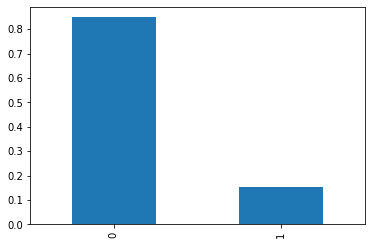

In [5]:
df['TenYearCHD'].value_counts(normalize = True).plot(kind = 'bar')

In [6]:
ms = df.isnull().sum()
ms[ms > 0]

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

In [7]:
df = df.fillna(method = 'ffill')

In [8]:
y = df['TenYearCHD']
X = df.drop('TenYearCHD',axis = 1)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 3)

In [11]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2968, 15) (1272, 15) (2968,) (1272,)


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

### DECISION TREE CLASSIFIER

In [13]:
dtc = DecisionTreeClassifier()

#### TRAIN

In [14]:
dtc.fit(X_train,y_train)
y_train_ypred = dtc.predict(X_train)
y_train_prob = dtc.predict_proba(X_train)[:,-1]

In [15]:
y_train_ypred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [16]:
y_train_prob

array([0., 0., 1., ..., 0., 1., 0.])

In [17]:
print('Confusion matrix - Train : \n',confusion_matrix(y_train,y_train_ypred))

Confusion matrix - Train : 
 [[2533    0]
 [   0  435]]


In [18]:
print('Overall accuracy : ',accuracy_score(y_train,y_train_ypred))

Overall accuracy :  1.0


In [19]:
print('AUC - Train : ',roc_auc_score(y_train,y_train_prob))

AUC - Train :  1.0


#### TEST

In [20]:
y_test_ypred = dtc.predict(X_test)
y_test_prob = dtc.predict_proba(X_test)[:,-1]

In [21]:
print('Confusion matrix - Test : \n',confusion_matrix(y_test,y_test_ypred))

Confusion matrix - Test : 
 [[909 154]
 [160  49]]


In [22]:
print('Overall accuracy - Test : ',accuracy_score(y_test,y_test_ypred))

Overall accuracy - Test :  0.7531446540880503


In [23]:
print('AUC - Test : ',roc_auc_score(y_test,y_test_prob))

AUC - Test :  0.5447883799124082


In [24]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)

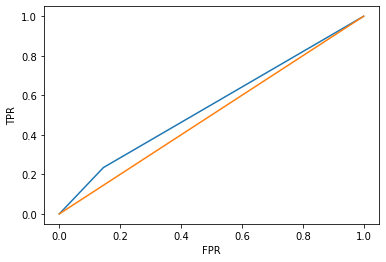

In [25]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### GRID SEARCH

In [26]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [27]:
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

params = {'max_depth' : [2,3,4,5,6],
         'min_samples_leaf' : [1,2,3,4,5,6,7],
         'min_samples_split' : [2,3,4,5,6,7,8,9,10],
         'criterion' : ['gini','entropy']}

model = GridSearchCV(dtc,param_grid=params,scoring = 'roc_auc',cv = 3)
model.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                      

In [28]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [29]:
gs = pd.DataFrame(model.cv_results_)

In [30]:
gs.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005210,0.007367,0.005198,0.007351,gini,2,1,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.668305,0.652346,0.659805,0.660152,0.006521,497
1,0.005208,0.007365,0.005207,0.007364,gini,2,1,3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.668305,0.652346,0.659805,0.660152,0.006521,497
2,0.005209,0.007367,0.000000,0.000000,gini,2,1,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.668305,0.652346,0.659805,0.660152,0.006521,497


In [31]:
gs[gs['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
150,0.010660,0.000471,0.004337,0.000478,gini,4,3,8,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.7032,0.654699,0.687961,0.681951,0.020256,1
151,0.010993,0.000816,0.004330,0.000471,gini,4,3,9,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.7032,0.654699,0.687961,0.681951,0.020256,1
152,0.011659,0.001698,0.003666,0.000470,gini,4,3,10,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.7032,0.654699,0.687961,0.681951,0.020256,1


#### TRAIN

In [32]:
dtc = DecisionTreeClassifier(**model.best_params_)

In [33]:
dtc.fit(X_train,y_train)
y_train_ypred = dtc.predict(X_train)
y_train_prob = dtc.predict_proba(X_train)[:,-1]

In [34]:
y_train_ypred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [35]:
y_train_prob

array([0.08510638, 0.0300158 , 0.08666667, ..., 0.1815562 , 0.84210526,
       0.0300158 ])

In [36]:
print('Confusion matrix - Train : \n',confusion_matrix(y_train,y_train_ypred))

Confusion matrix - Train : 
 [[2520   13]
 [ 402   33]]


In [37]:
print('Overall accuracy : ',accuracy_score(y_train,y_train_ypred))

Overall accuracy :  0.8601752021563343


In [38]:
print('AUC - Train : ',roc_auc_score(y_train,y_train_prob))

AUC - Train :  0.7284597338125252


#### TEST

In [39]:
y_test_ypred = dtc.predict(X_test)
y_test_prob = dtc.predict_proba(X_test)[:,-1]

In [40]:
print('Confusion matrix - Test : \n',confusion_matrix(y_test,y_test_ypred))

Confusion matrix - Test : 
 [[1052   11]
 [ 202    7]]


In [41]:
print('Overall accuracy - Test : ',accuracy_score(y_test,y_test_ypred))

Overall accuracy - Test :  0.8325471698113207


In [42]:
print('AUC - Test : ',roc_auc_score(y_test,y_test_prob))

AUC - Test :  0.6754063384751111


In [43]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)

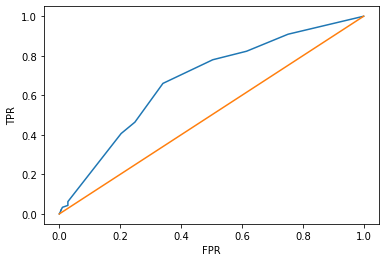

In [44]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

##### Ramdomized search cv

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

params = {
    'max_depth' : sp_randint(2,20),
    'min_samples_split' : sp_randint(2,40),
    'min_samples_leaf' : sp_randint(1,20),
    'criterion' : ['gini','entropy']
}

model = RandomizedSearchCV(dtc,param_distributions=params,scoring='roc_auc',cv = 3,n_iter=200)
model.fit(X,y)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=4,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=3,
                                                    min_samples_split=8,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'),
 

In [46]:
model.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 14,
 'min_samples_split': 12}

In [47]:
rsdf = pd.DataFrame(model.cv_results_)

In [48]:
rsdf.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015989,1.123916e-07,0.003998,2.247832e-07,gini,18,18,18,"{'criterion': 'gini', 'max_depth': 18, 'min_sa...",0.641674,0.624103,0.642658,0.636142,0.008525,83
1,0.017655,9.429099e-04,0.003333,4.704153e-04,gini,11,3,35,"{'criterion': 'gini', 'max_depth': 11, 'min_sa...",0.594858,0.635479,0.619030,0.616455,0.016687,124


In [49]:
rsdf[rsdf['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
147,0.005209,0.007367,0.0,0.0,gini,3,14,12,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.686485,0.659889,0.68999,0.678783,0.013441,1


#### TRAIN

In [50]:
dtc = DecisionTreeClassifier(**model.best_params_)

In [51]:
dtc.fit(X_train,y_train)
y_train_ypred = dtc.predict(X_train)
y_train_prob = dtc.predict_proba(X_train)[:,-1]

In [52]:
y_train_ypred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [53]:
y_train_prob

array([0.08510638, 0.03154574, 0.08940397, ..., 0.20854271, 0.67857143,
       0.03154574])

In [54]:
print('Confusion matrix - Train : \n',confusion_matrix(y_train,y_train_ypred))

Confusion matrix - Train : 
 [[2524    9]
 [ 416   19]]


In [55]:
print('Overall accuracy : ',accuracy_score(y_train,y_train_ypred))

Overall accuracy :  0.8568059299191375


In [56]:
print('AUC - Train : ',roc_auc_score(y_train,y_train_prob))

AUC - Train :  0.7151562592174107


#### TEST

In [57]:
y_test_ypred = dtc.predict(X_test)
y_test_prob = dtc.predict_proba(X_test)[:,-1]

In [58]:
print('Confusion matrix - Test : \n',confusion_matrix(y_test,y_test_ypred))

Confusion matrix - Test : 
 [[1058    5]
 [ 202    7]]


In [59]:
print('Overall accuracy - Test : ',accuracy_score(y_test,y_test_ypred))

Overall accuracy - Test :  0.8372641509433962


In [60]:
print('AUC - Test : ',roc_auc_score(y_test,y_test_prob))

AUC - Test :  0.683962964796752


In [61]:
fpr,tpr,thresholds = roc_curve(y_test,y_test_prob)

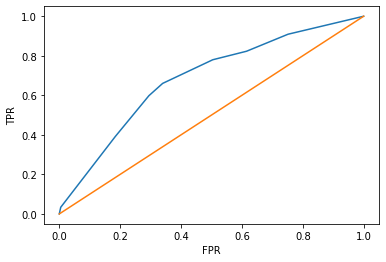

In [62]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

C:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


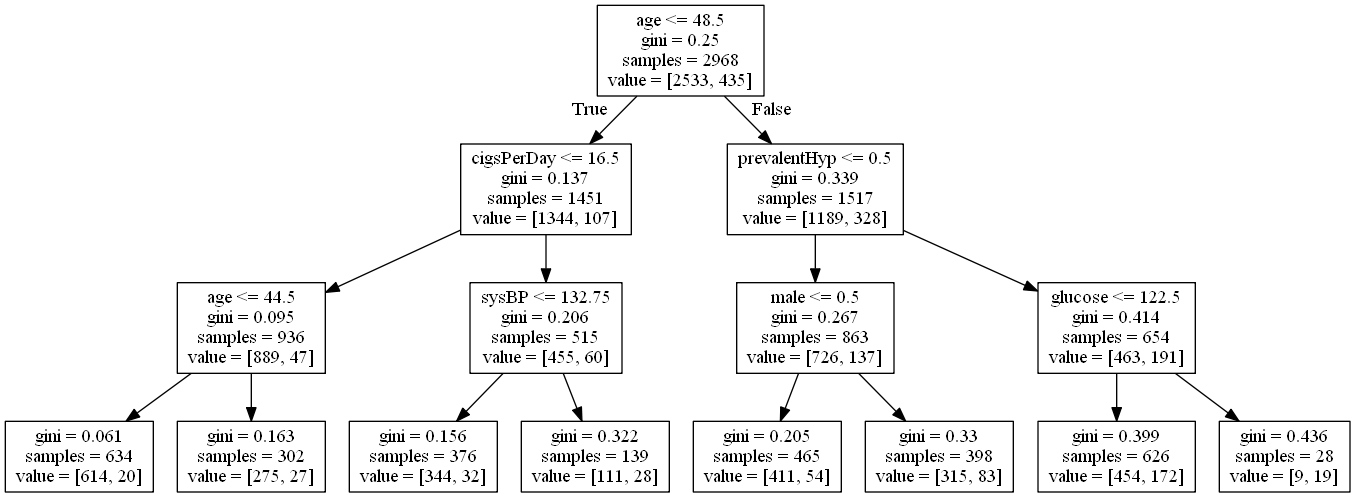

In [63]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus

features = X.columns
# Create DOT data
dot_data = export_graphviz(dtc, out_file=None, feature_names=features)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())